In [1]:
import pandas as pd

In [2]:
from pathlib import Path

In [3]:
from creditcard.entity import *

In [4]:
from creditcard.utils import *

In [5]:
from creditcard.constants import *

In [6]:
import os
import sys

In [14]:
ROOT_DIR = os.getcwd()  # to get current working directory

# config constants
CONFIG_DIR = os.path.join(ROOT_DIR, "configs")
CONFIG_FILE_NAME = "config.yaml"
CONFIG_FILE_PATH = os.path.join(CONFIG_DIR, CONFIG_FILE_NAME)
print(CONFIG_FILE_PATH)

c:\project\credit_card_fault\configs\config.yaml


In [8]:
SCHEMA_FILE_NAME = "schema.yaml"
SCHEMA_FILE_PATH = os.path.join(CONFIG_DIR,SCHEMA_FILE_NAME)
print(SCHEMA_FILE_PATH)

c:\project\credit_card_fault\research\configs\schema.yaml


In [9]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 0695-0DCC

 Directory of c:\project\credit_card_fault\research

24-04-2023  22:28    <DIR>          .
23-04-2023  22:16    <DIR>          ..
10-04-2023  21:09    <DIR>          artifact
17-04-2023  21:12         1,437,807 eda.ipynb
24-04-2023  22:31    <DIR>          logs
19-04-2023  21:01            20,134 stage_01_data_ingestion.ipynb
24-04-2023  21:13            36,151 stage_02_data_validation.ipynb
24-04-2023  22:44            10,463 stage_03_data_transformation.ipynb
               4 File(s)      1,504,555 bytes
               4 Dir(s)  46,311,346,176 bytes free


In [10]:
os.getcwd()
os.chdir("..")

In [13]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 0695-0DCC

 Directory of c:\project\credit_card_fault

23-04-2023  22:16    <DIR>          .
06-04-2023  20:43    <DIR>          ..
23-04-2023  22:16    <DIR>          .dvc
23-04-2023  22:09               142 .dvcignore
06-04-2023  21:18    <DIR>          .github
10-04-2023  20:43             1,960 .gitignore
19-04-2023  20:48    <DIR>          .pytest_cache
23-04-2023  22:22    <DIR>          artifact
24-04-2023  22:51    <DIR>          configs
23-04-2023  22:16               902 dvc.lock
24-04-2023  21:18               979 dvc.yaml
18-04-2023  22:20    <DIR>          env
06-04-2023  22:47               254 init_setup.sh
06-04-2023  20:51             1,087 LICENSE
24-04-2023  20:14    <DIR>          logs
23-04-2023  22:11             1,595 params.yaml
06-04-2023  21:36               226 pyproject.toml
06-04-2023  20:40                12 README.md
06-04-2023  22:29             2,706 requirements.txt
06-04-2023  23:27               

In [15]:
config_info = read_yaml(path_to_yaml = Path(CONFIG_FILE_PATH))

2023-04-25 09:13:46.376 | INFO     | creditcard.utils.common:read_yaml:34 - yaml file: c:\project\credit_card_fault\configs\config.yaml loaded successfully


In [16]:
pipeline_config = config_info.training_pipeline_config
print(pipeline_config)

{'artifact_dir': 'artifact', 'experiment_code': 'Development', 'pipeline_name': 'CreditCard', 'random_state': 1961}


In [17]:
artifact_dir = os.path.join(ROOT_DIR,pipeline_config.artifact_dir)

In [18]:
random_state = pipeline_config.random_state
print(random_state)

1961


In [19]:
SCHEMA_FILE_NAME = "schema.yaml"
SCHEMA_FILE_PATH = os.path.join(CONFIG_DIR,SCHEMA_FILE_NAME)
print(SCHEMA_FILE_PATH)

c:\project\credit_card_fault\configs\schema.yaml


In [20]:
data_transformation_config_info = config_info.data_transformation_config


In [21]:
print(data_transformation_config_info)

{'data_transformation_dir': 'stage03_data_transformation', 'preprocessing_object_dir': 'preprocessing', 'preprocessing_object_file_name': 'preprocessing_obj.pkl'}


In [22]:
data_transformation_dir_name = data_transformation_config_info.data_transformation_dir
data_transformation_dir = os.path.join(artifact_dir, data_transformation_dir_name)
print(data_transformation_dir)

c:\project\credit_card_fault\artifact\stage03_data_transformation


In [23]:
preprocessed_object_dir = data_transformation_config_info.preprocessing_object_dir
preprocessed_object_name = data_transformation_config_info.preprocessing_object_file_name
preprocessed_object_file_path = os.path.join(data_transformation_dir, preprocessed_object_dir,
                                                         preprocessed_object_name)

In [24]:
print(preprocessed_object_file_path)

c:\project\credit_card_fault\artifact\stage03_data_transformation\preprocessing\preprocessing_obj.pkl


In [26]:
FEATURE_GENERATOR_FILE_NAME = "feature_generator.yaml"
FEATURE_GENERATOR_FILE_PATH = Path(os.path.join(CONFIG_DIR, FEATURE_GENERATOR_FILE_NAME))

In [29]:
print(FEATURE_GENERATOR_FILE_PATH)

c:\project\credit_card_fault\configs\feature_generator.yaml


In [30]:
preprocessing = feature_generator_config=read_yaml(Path(FEATURE_GENERATOR_FILE_PATH))

2023-04-25 09:27:25.732 | INFO     | creditcard.utils.common:read_yaml:34 - yaml file: c:\project\credit_card_fault\configs\feature_generator.yaml loaded successfully


In [31]:
from creditcard.entity import *

In [33]:
from creditcard.components import *

In [34]:
from creditcard.config.configuration import *

In [35]:
data_validation_config_info = config_info.data_validation_config
print(data_validation_config_info)

{'data_validation_dir': 'stage02_data_validation', 'report_dir': 'data_drift_report', 'validated_test_file': 'validated_test.pkl', 'validated_train_file': 'validated_train.pkl'}


In [36]:
validated_train_file_name = data_validation_config_info.validated_train_file

In [37]:
data_validated_artifact_dir = Path(os.path.join(artifact_dir,data_validation_config_info.data_validation_dir))
print(data_validated_artifact_dir)

c:\project\credit_card_fault\artifact\stage02_data_validation


In [38]:
validated_train_file_path = os.path.join(data_validated_artifact_dir, validated_train_file_name)
print(validated_train_file_path)

c:\project\credit_card_fault\artifact\stage02_data_validation\validated_train.pkl


In [39]:
validated_train_data = pd.read_pickle(validated_train_file_path)

In [40]:
validated_train_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,6637,80000.0,2,3,1,41,2,2,2,2,...,61129.0,62348.0,61193.0,0.0,5000.0,2400.0,2341.0,0.0,2439.0,1
1,29302,50000.0,1,1,2,25,0,0,0,2,...,48174.0,48731.0,49655.0,4000.0,4000.0,2000.0,2000.0,2200.0,1700.0,0
2,2164,20000.0,1,1,2,30,0,0,2,0,...,19391.0,19120.0,19158.0,6500.0,84.0,7171.0,1000.0,1000.0,2000.0,0
3,6442,70000.0,2,2,2,24,0,0,0,0,...,64457.0,66021.0,67267.0,3167.0,2521.0,2400.0,2600.0,2614.0,2376.0,0
4,23135,210000.0,2,3,1,41,0,0,-1,-1,...,-649.0,-649.0,-649.0,2000.0,17864.0,569.0,0.0,0.0,1000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,854,140000.0,2,2,2,23,0,0,0,0,...,43455.0,43980.0,44614.0,2100.0,2027.0,1800.0,1600.0,1750.0,1700.0,0
23996,25278,170000.0,2,1,2,27,-1,0,0,0,...,38330.0,39602.0,39922.0,1650.0,4500.0,4000.0,4000.0,3000.0,3000.0,0
23997,6002,500000.0,2,1,2,37,-1,-1,-1,-1,...,0.0,1450.0,2668.0,1625.0,517.0,0.0,1450.0,2668.0,1480.0,0
23998,21747,20000.0,2,1,2,24,0,0,2,-1,...,6572.0,5016.0,2508.0,2778.0,0.0,6572.0,5016.0,0.0,0.0,0


In [41]:
schema_data = read_yaml(path_to_yaml=Path(SCHEMA_FILE_PATH))

2023-04-25 09:46:37.458 | INFO     | creditcard.utils.common:read_yaml:34 - yaml file: c:\project\credit_card_fault\configs\schema.yaml loaded successfully


In [42]:
schema_data

ConfigBox({'base_model_features_to_drop': ['default', 'ID'], 'base_model_trained_columns': ['LIMIT_BAL_(5000, 50000]', 'LIMIT_BAL_(50000, 100000]', 'LIMIT_BAL_(100000, 150000]', 'LIMIT_BAL_(150000, 200000]', 'LIMIT_BAL_(200000, 300000]', 'LIMIT_BAL_(300000, 400000]', 'LIMIT_BAL_(400000, 500000]', 'LIMIT_BAL_(500000, 1100000]', 'SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'AGE_(20, 25]', 'AGE_(25, 30]', 'AGE_(30, 35]', 'AGE_(35, 40]', 'AGE_(40, 50]', 'AGE_(50, 60]', 'AGE_(60, 80]', 'PAY_0_-2', 'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_

In [43]:
x_train = validated_train_data.drop(columns=schema_data.base_model_features_to_drop)

In [44]:
x_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,80000.0,2,3,1,41,2,2,2,2,2,...,60313.0,61129.0,62348.0,61193.0,0.0,5000.0,2400.0,2341.0,0.0,2439.0
1,50000.0,1,1,2,25,0,0,0,2,2,...,47613.0,48174.0,48731.0,49655.0,4000.0,4000.0,2000.0,2000.0,2200.0,1700.0
2,20000.0,1,1,2,30,0,0,2,0,0,...,19995.0,19391.0,19120.0,19158.0,6500.0,84.0,7171.0,1000.0,1000.0,2000.0
3,70000.0,2,2,2,24,0,0,0,0,0,...,69390.0,64457.0,66021.0,67267.0,3167.0,2521.0,2400.0,2600.0,2614.0,2376.0
4,210000.0,2,3,1,41,0,0,-1,-1,-2,...,364.0,-649.0,-649.0,-649.0,2000.0,17864.0,569.0,0.0,0.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,140000.0,2,2,2,23,0,0,0,0,0,...,44739.0,43455.0,43980.0,44614.0,2100.0,2027.0,1800.0,1600.0,1750.0,1700.0
23996,170000.0,2,1,2,27,-1,0,0,0,0,...,39698.0,38330.0,39602.0,39922.0,1650.0,4500.0,4000.0,4000.0,3000.0,3000.0
23997,500000.0,2,1,2,37,-1,-1,-1,-1,-1,...,517.0,0.0,1450.0,2668.0,1625.0,517.0,0.0,1450.0,2668.0,1480.0
23998,20000.0,2,1,2,24,0,0,2,-1,-1,...,2778.0,6572.0,5016.0,2508.0,2778.0,0.0,6572.0,5016.0,0.0,0.0


In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.impute import SimpleImputer

In [46]:
kmeans = KMeans(n_init='auto',init='k-means++',random_state=42)

In [47]:
visualizer = KElbowVisualizer(kmeans,k=(2,15))

KElbowVisualizer(ax=<Axes: >,
                 estimator=KMeans(n_clusters=14, n_init='auto',
                                  random_state=42),
                 k=(2, 15))

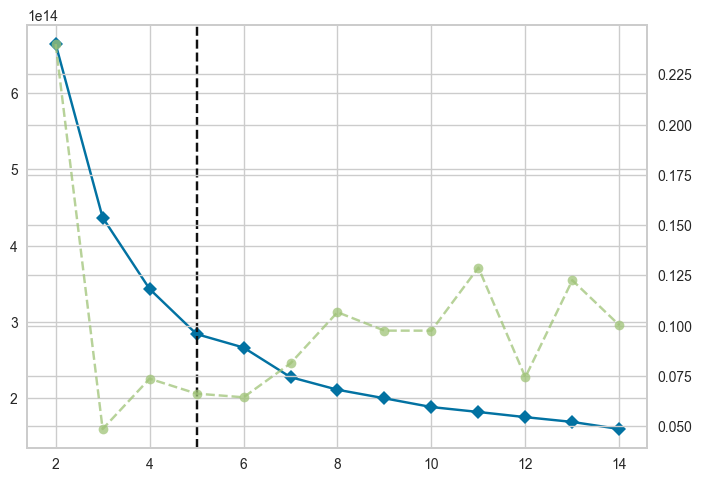

In [48]:
visualizer.fit(x_train)

In [50]:
total_clusters = visualizer.elbow_value_
print(total_clusters)

5


In [52]:
cluster = KMeans(n_clusters=total_clusters,init='k-means++',random_state=42)
cluster.fit(x_train)

c:\project\credit_card_fault\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [53]:
feature_generator_config=read_yaml(Path(FEATURE_GENERATOR_FILE_PATH))

2023-04-25 11:05:51.344 | INFO     | creditcard.utils.common:read_yaml:34 - yaml file: c:\project\credit_card_fault\configs\feature_generator.yaml loaded successfully


In [54]:
feature_generator_config.keys()

dict_keys(['pay_x', 'bill_amt', 'pay_amt', 'Age', 'limit'])

In [66]:
for master in feature_generator_config.keys():
    print(master)
    master_data = feature_generator_config[master]
    print(master_data)


pay_x
{'columns': ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], 'lower_bound': -2, 'upper_bound': 4}
bill_amt
{'columns': ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], 'bins': [-350000, -1, 0, 25000, 75000, 200000, 2000000], 'lower_bound': -350000, 'upper_bound': 2000000}
pay_amt
{'columns': ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], 'bins': [-1, 0, 25000, 50000, 100000, 2000000], 'lower_bound': -1, 'upper_bound': 2000000}
Age
{'columns': ['AGE'], 'bins': [20, 25, 30, 35, 40, 50, 60, 80], 'lower_bound': 20, 'upper_bound': 80}
limit
{'columns': ['LIMIT_BAL'], 'bins': [5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000], 'lower_bound': 5000, 'upper_bound': 1100000}


In [68]:
master_data.columns

BoxList(['LIMIT_BAL'])

In [55]:
for master in feature_generator_config.keys():
    master_data = feature_generator_config[master]
    print(master_data)

{'columns': ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], 'lower_bound': -2, 'upper_bound': 4}
{'columns': ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], 'bins': [-350000, -1, 0, 25000, 75000, 200000, 2000000], 'lower_bound': -350000, 'upper_bound': 2000000}
{'columns': ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], 'bins': [-1, 0, 25000, 50000, 100000, 2000000], 'lower_bound': -1, 'upper_bound': 2000000}
{'columns': ['AGE'], 'bins': [20, 25, 30, 35, 40, 50, 60, 80], 'lower_bound': 20, 'upper_bound': 80}
{'columns': ['LIMIT_BAL'], 'bins': [5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000], 'lower_bound': 5000, 'upper_bound': 1100000}


In [59]:
data = feature_generator_config

In [60]:
data_generated = data.copy()

In [78]:
data_generated

ConfigBox({'pay_x': {'columns': ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], 'lower_bound': -2, 'upper_bound': 4}, 'bill_amt': {'columns': ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], 'bins': [-350000, -1, 0, 25000, 75000, 200000, 2000000], 'lower_bound': -350000, 'upper_bound': 2000000}, 'pay_amt': {'columns': ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], 'bins': [-1, 0, 25000, 50000, 100000, 2000000], 'lower_bound': -1, 'upper_bound': 2000000}, 'Age': {'columns': ['AGE'], 'bins': [20, 25, 30, 35, 40, 50, 60, 80], 'lower_bound': 20, 'upper_bound': 80}, 'limit': {'columns': ['LIMIT_BAL'], 'bins': [5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000], 'lower_bound': 5000, 'upper_bound': 1100000}})

In [ ]:
data_generated = data.copy()
        import pandas
        
        for master in feature_generator_config.keys():
            master_data = feature_generator_config[master]
            for column in master_data.columns:
                data_generated[column] = data[column].clip(lower=master_data.lower_bound, upper=master_data.upper_bound)
                if master != "pay_x":
                    data_generated[column] = pandas.cut(data_generated[column], bins=master_data.bins)

In [79]:
data = x_train.copy()

In [80]:
data_generated = data.copy()

In [85]:
data_generated

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,80000.0,2,3,1,41,2,2,2,2,2,...,60313.0,61129.0,62348.0,61193.0,0.0,5000.0,2400.0,2341.0,0.0,2439.0
1,50000.0,1,1,2,25,0,0,0,2,2,...,47613.0,48174.0,48731.0,49655.0,4000.0,4000.0,2000.0,2000.0,2200.0,1700.0
2,20000.0,1,1,2,30,0,0,2,0,0,...,19995.0,19391.0,19120.0,19158.0,6500.0,84.0,7171.0,1000.0,1000.0,2000.0
3,70000.0,2,2,2,24,0,0,0,0,0,...,69390.0,64457.0,66021.0,67267.0,3167.0,2521.0,2400.0,2600.0,2614.0,2376.0
4,210000.0,2,3,1,41,0,0,-1,-1,-2,...,364.0,-649.0,-649.0,-649.0,2000.0,17864.0,569.0,0.0,0.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,140000.0,2,2,2,23,0,0,0,0,0,...,44739.0,43455.0,43980.0,44614.0,2100.0,2027.0,1800.0,1600.0,1750.0,1700.0
23996,170000.0,2,1,2,27,-1,0,0,0,0,...,39698.0,38330.0,39602.0,39922.0,1650.0,4500.0,4000.0,4000.0,3000.0,3000.0
23997,500000.0,2,1,2,37,-1,-1,-1,-1,-1,...,517.0,0.0,1450.0,2668.0,1625.0,517.0,0.0,1450.0,2668.0,1480.0
23998,20000.0,2,1,2,24,0,0,2,-1,-1,...,2778.0,6572.0,5016.0,2508.0,2778.0,0.0,6572.0,5016.0,0.0,0.0


In [93]:
for master in feature_generator_config.keys():
            master_data = feature_generator_config[master]
            print(master_data)
            for column in master_data.columns:
                    print(column)
                    

{'columns': ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], 'lower_bound': -2, 'upper_bound': 4}
PAY_0
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6
{'columns': ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], 'bins': [-350000, -1, 0, 25000, 75000, 200000, 2000000], 'lower_bound': -350000, 'upper_bound': 2000000}
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
{'columns': ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], 'bins': [-1, 0, 25000, 50000, 100000, 2000000], 'lower_bound': -1, 'upper_bound': 2000000}
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6
{'columns': ['AGE'], 'bins': [20, 25, 30, 35, 40, 50, 60, 80], 'lower_bound': 20, 'upper_bound': 80}
AGE
{'columns': ['LIMIT_BAL'], 'bins': [5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000], 'lower_bound': 5000, 'upper_bound': 1100000}
LIMIT_BAL


In [97]:
for master in feature_generator_config.keys():
            master_data = feature_generator_config[master]
            for column in master_data.columns:
                    data_generated[column] = data[column].clip(lower=master_data.lower_bound, upper=master_data.upper_bound)
                    if master != "pay_x":
                      data_generated[column] = pandas.cut(data_generated[column], bins=master_data.bins)



In [98]:
encoder = OneHotEncoder(sparse_output=False , handle_unknown='ignore')

In [100]:
e

NameError: name 'e' is not defined